In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('OSM_training_data/ensemble_dataset.csv')

In [3]:
dataset.head()

cat_dict = {0:'ADULT', 1:'COUNTERFEIT', 2:'LEGIT', 3:'PHARMA', 4:'SMOKE', 5:'TMS', 6:'WEAPON'}
dataset['category_number'] = dataset['category_number'].map(cat_dict)

In [4]:
features = ['name', 'bodytxt', 'tagtxt', 'price', 'category_number', 'combinedtxt_noNumSWPunc_morethan2char']
df = dataset[features]

In [5]:
df.head()

name  \
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...   
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...   
2     Vitamins Biotics Research - Detoxification 4oz   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...   
4  Herbal Supplements Natural Natural Blood Press...   

                                             bodytxt tagtxt   price  \
0  BLOODSHR3D (WAR EDITION) Ultra Premium Fat Bur...    NaN  282.84   
1  Hyland's Cell Salts #12 Silicea 30X Tablets, N...    NaN  145.88   
2  Biotics Research - Detoxification 4oz Product ...    NaN  248.77   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...    NaN  492.20   
4  Natural Blood Pressure Supplement: Blood Press...    NaN  233.52   

  category_number              combinedtxt_noNumSWPunc_morethan2char  
0           LEGIT  Fat Burners Thermogenics BLOODSHRD WAR EDITION...  
1           LEGIT  Vitamins Hylands Cell Salts Silicea Tablets Na...  
2           LEGIT  Vitamins Biotics Research Detoxification Bioti...  
3           LEGIT  HEWLETT PACKARD Toner Page Yield Black Clear S...  
4           LEGIT  Herbal Supplements Natural Natural Blood Press...

In [6]:
df.isnull().sum(axis = 0)

name                                        0
bodytxt                                   109
tagtxt                                   3052
price                                     259
category_number                             0
combinedtxt_noNumSWPunc_morethan2char       0
dtype: int64

In [7]:
my_tab = pd.crosstab(index = df['category_number'],  # Make a crosstab
                              columns="count")      # Name the count column

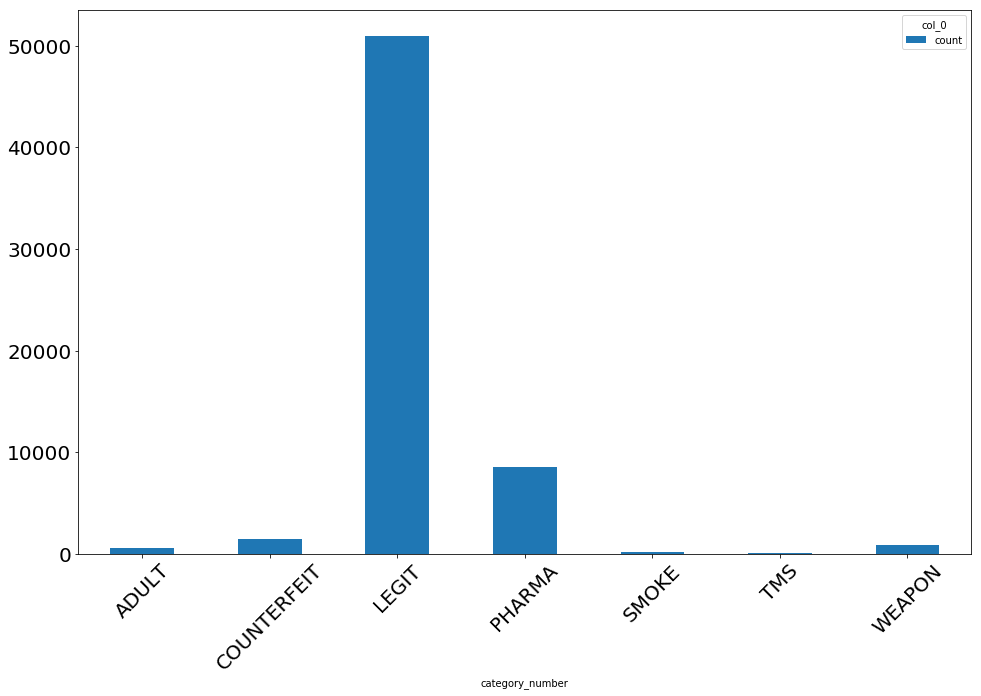

In [8]:
my_tab.plot.bar(figsize = (16, 10), fontsize = 20, rot = 45)


In [9]:
my_tab

col_0            count
category_number       
ADULT              631
COUNTERFEIT       1478
LEGIT            50933
PHARMA            8561
SMOKE              234
TMS                114
WEAPON             867

81% of the dataset is LEGIT as shown. 

In [10]:
(my_tab/my_tab.sum()) * 100

col_0                count
category_number           
ADULT             1.004489
COUNTERFEIT       2.352829
LEGIT            81.080264
PHARMA           13.628259
SMOKE             0.372505
TMS               0.181477
WEAPON            1.380178

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

Using TensorFlow backend.


In [12]:
import nltk

In [13]:
# nltk.download()

In [14]:
df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '').str.split()[0]

['Fat',
 'Burners',
 'Thermogenics',
 'BLOODSHRD',
 'WAR',
 'EDITION',
 'Ultra',
 'Premium',
 'Fat',
 'Burning',
 'Thermogenic',
 'Fuel',
 'by',
 'Olympus',
 'Labs',
 'GRAPE',
 'BUBBLEGUM']

In [15]:
df['name'][0]

'Fat Burners & Thermogenics BLOODSHR3D (WAR EDITION) Ultra Premium Fat Burning & Thermogenic Fuel by Olympus Labs (GRAPE BUBBLEGUM)'

In [16]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [17]:
test = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '').str.split()[0]

porter = PorterStemmer()
lancaster=LancasterStemmer()


## Stemming 

The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. One table containing about 120 rules indexed by the last letter of a suffix. On each iteration, it tries to find an applicable rule by the last character of the word. LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning.

PorterStemmer is known for its simplicity and speed. It is commonly useful in Information Retrieval Environments known as IR Environments for fast recall and fetching of search queries

In [18]:
for word in test:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Fat                 fat                 fat                 
Burners             burner              burn                
Thermogenics        thermogen           thermog             
BLOODSHRD           bloodshrd           bloodshrd           
WAR                 war                 war                 
EDITION             edit                edit                
Ultra               ultra               ultr                
Premium             premium             prem                
Fat                 fat                 fat                 
Burning             burn                burn                
Thermogenic         thermogen           thermog             
Fuel                fuel                fuel                
by                  by                  by                  
Olympus             olympu              olymp               
Labs                lab                 lab                 
GRAPE               grape               grap                
BUBBLEGUM           bubb

## Stop words

Stop Words are words which do not contain important significance to be used in Search Queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information.

In [19]:
from nltk.stem.snowball import SnowballStemmer

englishStemmer2=SnowballStemmer("english", ignore_stopwords=True)


In [20]:
# nltk.download('stopwords')

In [21]:
englishStemmer2.stem('having')

'having'

## Stopwords Removal

In [30]:
# nltk.download('wordnet')
test = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '')

test[0]

'Fat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUM'

In [33]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize

tokens = word_tokenize(test[0])
result = [i for i in tokens if not i in stop_words]

result

['Fat',
 'Burners',
 'Thermogenics',
 'BLOODSHRD',
 'WAR',
 'EDITION',
 'Ultra',
 'Premium',
 'Fat',
 'Burning',
 'Thermogenic',
 'Fuel',
 'Olympus',
 'Labs',
 'GRAPE',
 'BUBBLEGUM']

## Lemmatization

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form. The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”. 

For example, was --> be 


In [34]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

for word in test + ['was', ]:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos = 'v')))

Fat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUMwasFat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUMwas
Vitamins Hylands Cell Salts  Silicea X Tablets Natural Homeopathic Acne Pimples Blackheads and Hair and Nails Relief  CountwasVitamins Hylands Cell Salts  Silicea X Tablets Natural Homeopathic Acne Pimples Blackheads and Hair and Nails Relief  Countwas
Vitamins Biotics Research  Detoxification ozwasVitamins Biotics Research  Detoxification ozwas
HEWLETTPACKARD CA Toner  PageYield Black Clear Sharp Printouts For HighImpact Results by HPwasHEWLETTPACKARD CA Toner  PageYield Black Clear Sharp Printouts For HighImpact Results by HPwas
Herbal Supplements Natural Natural Blood Pressure Supplement Blood Pressure Support with Hawthorn Berry and Uva Ursi Herbs and Vitamins for High Blood Pressure  Capsules  Money Back GuaranteewasHerbal Supplemen

Enhanced Malewas    Enhanced Malewas    
Garcinia Cambogia Extract Fast Acting Weight Loss and Energy Pills for Women  Men  Boost Metabolism Green Coffee Bean  Raspberry Ketones  Antioxidant Support  Detox Cleanse  By Griffith NaturalswasGarcinia Cambogia Extract Fast Acting Weight Loss and Energy Pills for Women  Men  Boost Metabolism Green Coffee Bean  Raspberry Ketones  Antioxidant Support  Detox Cleanse  By Griffith Naturalswas
Absolute Nutrition Nophedra Capsules  Count BottlewasAbsolute Nutrition Nophedra Capsules  Count Bottlewas
Testro Vida Pro   Capsules  Natural Testosterone Booster Supplement for Men and Women  Increase Stamina Size Energy  with Long Jack Horny Goat Weed Tribulus Terrestris Zinc Avena SativawasTestro Vida Pro   Capsules  Natural Testosterone Booster Supplement for Men and Women  Increase Stamina Size Energy  with Long Jack Horny Goat Weed Tribulus Terrestris Zinc Avena Sativawas
Aspercreme Pain Relieving Creme With Lidocaine  OuncewasAspercreme Pain Relievin

HealthAZ HealthAZ Health AZ Extra Strength Pain Relief PM Comparte to Tylenol PM active ingredientwasHealthAZ HealthAZ Health AZ Extra Strength Pain Relief PM Comparte to Tylenol PM active ingredientwas
Creative Bioscience Probiotic   CountwasCreative Bioscience Probiotic   Countwas
Sudafed Sudafed PE Pressure  Pain  Cold Caplets  CountwasSudafed Sudafed PE Pressure  Pain  Cold Caplets  Countwas
Bel Marra Hearing Rescue  Capsules BrandwasBel Marra Hearing Rescue  Capsules Brandwas
Percogesic Percogesic Aspirin Original Coated Tablets  CountwasPercogesic Percogesic Aspirin Original Coated Tablets  Countwas
Organic Veda Organic Triphala Powder  Ounce   Lb  Pure and Natural Herbs Raw Organic Super Food Supplement Non GMO Gluten FREE     USDA Certified Organic     ALL NATURALwasOrganic Veda Organic Triphala Powder  Ounce   Lb  Pure and Natural Herbs Raw Organic Super Food Supplement Non GMO Gluten FREE     USDA Certified Organic     ALL NATURALwas
Aleve Aleve PM Caplets  CountwasAleve Alev

Picture Porefect  oz  mLwasPicture Porefect  oz  mLwas
The Microdelivery TripleAcid Brightening Peel  x  oz  g presaturated chemical peel padswasThe Microdelivery TripleAcid Brightening Peel  x  oz  g presaturated chemical peel padswas
Physical Chemistry  oz  mLwasPhysical Chemistry  oz  mLwas
Skin Perfecting Serum  ozwasSkin Perfecting Serum  ozwas
WHITE Advanced Brightening Serum  oz  mLwasWHITE Advanced Brightening Serum  oz  mLwas
MemPlex Brain Memory Supplement with Pantothenic Acid  mg CDP Choline Vitamin B  B Folic Acid Rosemary Ginger Extracts  TabletswasMemPlex Brain Memory Supplement with Pantothenic Acid  mg CDP Choline Vitamin B  B Folic Acid Rosemary Ginger Extracts  Tabletswas
Muira Puama Extract Powder ozwasMuira Puama Extract Powder ozwas
Caro White Lightening Beauty Jar Cream ozmlwasCaro White Lightening Beauty Jar Cream ozmlwas
Natural Factors  Stress B Formula Plus mg of Vitamin C Support for Energy  Normal Nerve Function  TabletswasNatural Factors  Stress B Formula 

Oem Factory Stock   Ford Mustang With Subwoofer Black Weather Rear Back Cargo Trunk Liner MatwasOem Factory Stock   Ford Mustang With Subwoofer Black Weather Rear Back Cargo Trunk Liner Matwas
New Oem  Button  Ford Fusion Flipkey R NfAtaawasNew Oem  Button  Ford Fusion Flipkey R NfAtaawas
OEM Lincoln Keyless Entry Remote Fob Button Smart Proximity Key FCC ID MNAC  PN EJTKAF RwasOEM Lincoln Keyless Entry Remote Fob Button Smart Proximity Key FCC ID MNAC  PN EJTKAF Rwas
Stellar  FlipKey OEMAftermarket Adapter KitwasStellar  FlipKey OEMAftermarket Adapter Kitwas
AutoLoc Power Accessories  FlipKey OEM and Aftermarket Adapter KitwasAutoLoc Power Accessories  FlipKey OEM and Aftermarket Adapter Kitwas
Shimano  BR Super SLR Brake Caliper Set Road Bike Front Silver OEM Package KBRAFCLALwasShimano  BR Super SLR Brake Caliper Set Road Bike Front Silver OEM Package KBRAFCLALwas
OEM Jeep Keyless Entry Remote Fob Button Smart Proximity Key FCC ID MN  PN wasOEM Jeep Keyless Entry Remote Fob Button S

 Lochsa bearing tactical folding knife D blade aluminum handle camping hunting outdoor Pocket Knives EDC tools Survival Cut was Lochsa bearing tactical folding knife D blade aluminum handle camping hunting outdoor Pocket Knives EDC tools Survival Cut was
High qualityStedemon ZKC C folding knifeBladeCSatinHandleGCamping Hunting Survival Kitchen Knives Outdoor EDC wasHigh qualityStedemon ZKC C folding knifeBladeCSatinHandleGCamping Hunting Survival Kitchen Knives Outdoor EDC was
Free shipping Composite steel forging straight knife high hardness of pure manual wilderness survival knife selfdefense wasFree shipping Composite steel forging straight knife high hardness of pure manual wilderness survival knife selfdefense was
GAERZI High Hardness DC Steel Vintage Case Tactical knife Hunting Knife Fixed Blade Survival Knives Carbon Fiber Handle  wasGAERZI High Hardness DC Steel Vintage Case Tactical knife Hunting Knife Fixed Blade Survival Knives Carbon Fiber Handle  was
Bearing System Tactica

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Jolie Gel Eye Liner Pencil  Long Lasting Intense Color NoblewasJolie Gel Eye Liner Pencil  Long Lasting Intense Color Noblewas
Ulta Matte Eyeshadow Coconut  OuncewasUlta Matte Eyeshadow Coconut  Ouncewas
Femme Couture Eternal Color Teal Felt Tipped Eyeliner TealwasFemme Couture Eternal Color Teal Felt Tipped Eyeliner Tealwas
Merzy Gel Eyeliner ROSY BURGUNDY GwasMerzy Gel Eyeliner ROSY BURGUNDY Gwas
Wet n Wild HO Proof Felt Tip Liquid  BlackBrownwasWet n Wild HO Proof Felt Tip Liquid  BlackBrownwas
Pur Minerals Hydrafluid Water Serum Foundation Medium  OuncewasPur Minerals Hydrafluid Water Serum Foundation Medium  Ouncewas
Mommy Makeup Waterproof Stay Put Gel Eyeliner  Blue Angel Classic Navy Blue  smudgeproof waterproof and long wearingwasMommy Makeup Waterproof Stay Put Gel Eyeliner  Blue Angel Classic Navy Blue  smudgeproof waterproof and long wearingwas
Etude House Blend For Eyes  Dry RosewasEtude House Blend For Eyes  Dry Rosewas
Rimmel Exaggerate Waterproof Eye Definer Noir  Blac

Prescriptives Softlining Pencil Jet  ozwasPrescriptives Softlining Pencil Jet  ozwas
Digestive Advantage Lactose Defense formula  Capsules Pack of wasDigestive Advantage Lactose Defense formula  Capsules Pack of was
Love My Eyes Eyeliner Duo SeductionwasLove My Eyes Eyeliner Duo Seductionwas
Pinkiou Professional Permanent Makeup Pen Machine Electric Eyebrow Tattoo Gun Equipment with Power SupplywasPinkiou Professional Permanent Makeup Pen Machine Electric Eyebrow Tattoo Gun Equipment with Power Supplywas
Layla Cosmetics Micro Eyeliner Pencil No   OuncewasLayla Cosmetics Micro Eyeliner Pencil No   Ouncewas
Melaleuca Fiberwise Citrus OrangewasMelaleuca Fiberwise Citrus Orangewas
Billion Dollar Brows  Eyebrow Powder  TaupewasBillion Dollar Brows  Eyebrow Powder  Taupewas
Alfaparf Cioccolato Hydrating Hair Lotion   oz x  vialswasAlfaparf Cioccolato Hydrating Hair Lotion   oz x  vialswas
Eyebrow Stamp Powder Stamper Waterproof Longlasting Brown Easy Press Natural Shape in Seconds Dark Brown

 Dozen  Pink Ribbon GLITTER BUTTERFLY Tattoos  BREAST CANCER AWARENESS Event Giveawayswas Dozen  Pink Ribbon GLITTER BUTTERFLY Tattoos  BREAST CANCER AWARENESS Event Giveawayswas
Benefit Brow Zings Total Taming  Shaping Kit For Brows   Medium gozwasBenefit Brow Zings Total Taming  Shaping Kit For Brows   Medium gozwas
Temporary Tattoos For Bachelorette Party Bride  Team Bride Tattoos Pack of wasTemporary Tattoos For Bachelorette Party Bride  Team Bride Tattoos Pack of was
Tinksky Permanent Eyelash Makeup Tool Ink Cup Ring Holder Disposable Pigment Container for Eyebrow Tattooingpcs Rings and pcs CupswasTinksky Permanent Eyelash Makeup Tool Ink Cup Ring Holder Disposable Pigment Container for Eyebrow Tattooingpcs Rings and pcs Cupswas
SMILCO  Sheets Temporary Tattoos Metallic For Man Fake Tattoos Sticker For Guys for Men Mechanical Arm Elk Wolf Totem SupermanwasSMILCO  Sheets Temporary Tattoos Metallic For Man Fake Tattoos Sticker For Guys for Men Mechanical Arm Elk Wolf Totem Supermanw

Mardi Gras Variety Pack set of  assorted premium waterproof metallic purple  green temporary jewelry foil Flash TattooswasMardi Gras Variety Pack set of  assorted premium waterproof metallic purple  green temporary jewelry foil Flash Tattooswas
Mardi Gras Variety Pack set of  assorted premium waterproof metallic purple  green temporary jewelry foil Flash TattooswasMardi Gras Variety Pack set of  assorted premium waterproof metallic purple  green temporary jewelry foil Flash Tattooswas
Framesi Framcolor  Hair Coloring Cream SB Light Sandy Blonde  OuncewasFramesi Framcolor  Hair Coloring Cream SB Light Sandy Blonde  Ouncewas
Colortrak Professional Popup Coloring  Highlighting Foil Sheets  boxes x  count eachwasColortrak Professional Popup Coloring  Highlighting Foil Sheets  boxes x  count eachwas
Root Cover Up Medium Brown Hair Color  Cover Grey Roots InstantlywasRoot Cover Up Medium Brown Hair Color  Cover Grey Roots Instantlywas
lot of  Everpro Essentials Gray Away for Men blackDark Br

its a  Miracle LeaveIn product  oz Pack of wasits a  Miracle LeaveIn product  oz Pack of was
Mary Kay Signature Eye Color WHITE SANDwasMary Kay Signature Eye Color WHITE SANDwas
its a  Miracle LeaveIn product  oz Pack of wasits a  Miracle LeaveIn product  oz Pack of was
Flower Shadow Play Eye Shadow Quad EQ Secret GardenwasFlower Shadow Play Eye Shadow Quad EQ Secret Gardenwas
jane iredale Eye Steppes goGreen  ozwasjane iredale Eye Steppes goGreen  ozwas
John Masters Organics Shine On Leavein Hair Treatment  OuncewasJohn Masters Organics Shine On Leavein Hair Treatment  Ouncewas
SHANY Bold Effect Eye Shadow Paraben Free Euphoric  OuncewasSHANY Bold Effect Eye Shadow Paraben Free Euphoric  Ouncewas
Hicks Edges Pomade  oz Pack of wasHicks Edges Pomade  oz Pack of was
Vodisa Eyeshadow Palette  Waterproof Makeup Nature Glow Matte Eye Shadows Kits Professional Make Up Shimmer Eye Shadow Pallets with Eyes Makeup Brushes Set Beauty Cosmetics wasVodisa Eyeshadow Palette  Waterproof Makeup Natu

T Micro Volumizing Hot Rollers  Inch  CountwasT Micro Volumizing Hot Rollers  Inch  Countwas
 London Folding Pocket Hair and Beard Comb BCwas London Folding Pocket Hair and Beard Comb BCwas
Vega Handmade Comb  Pocket HMCD  PcswasVega Handmade Comb  Pocket HMCD  Pcswas
Diane Carbon Cutting Comb   InchwasDiane Carbon Cutting Comb   Inchwas
Aukmla Bridal Wedding Feather Hair Accessories and Clips for Women and Girls on PartywasAukmla Bridal Wedding Feather Hair Accessories and Clips for Women and Girls on Partywas
Wooden Hair Brush by GoWoo Fine Tooth Detangling Natural and Handmade for Men and Women From Earth to EarthwasWooden Hair Brush by GoWoo Fine Tooth Detangling Natural and Handmade for Men and Women From Earth to Earthwas
Curlformers Deluxe Range Glam up Kit Corkscrew Curls for Long HairwasCurlformers Deluxe Range Glam up Kit Corkscrew Curls for Long Hairwas
Evolve SatinCovered Rollers  PiecewasEvolve SatinCovered Rollers  Piecewas
IDEEB Gel Eye Shadow No  Crystal White  Countwas

Aukmla Wedding Bridal Hair Combs Accessories with Crystals for Women and GirlswasAukmla Wedding Bridal Hair Combs Accessories with Crystals for Women and Girlswas
Rubies Costume Co Jumbo Comb CostumewasRubies Costume Co Jumbo Comb Costumewas
Rubies Costume Co Jumbo Comb CostumewasRubies Costume Co Jumbo Comb Costumewas
Lux Accessories Rose Gold Rhinestone Bridal Floral Flower Vine Metal Hair CombwasLux Accessories Rose Gold Rhinestone Bridal Floral Flower Vine Metal Hair Combwas
Beauty Silicon Mix Silicon mix intensive hair deep treatment oz by avantihealth and beauty  OuncewasBeauty Silicon Mix Silicon mix intensive hair deep treatment oz by avantihealth and beauty  Ouncewas
REDMAINE MS  BT PORTABLE HIGH POWER OUTPUT FM RADIO WIRELESS BLUETOOTH SPEAKERwasREDMAINE MS  BT PORTABLE HIGH POWER OUTPUT FM RADIO WIRELESS BLUETOOTH SPEAKERwas
Lux Accessories Rose Gold Rhinestone Bridal Floral Flower Vine Metal Hair CombwasLux Accessories Rose Gold Rhinestone Bridal Floral Flower Vine Metal Ha

SARDINE F MULTIFUNCTIONAL OUTDOOR IP WATERPROOF PORTABLE POWER BANK BLUETOOTH SPEAKER YELLOWwasSARDINE F MULTIFUNCTIONAL OUTDOOR IP WATERPROOF PORTABLE POWER BANK BLUETOOTH SPEAKER YELLOWwas
MONOI de TAHITI TIARE OIL BUTTER ORGANIC   Natural  Virgin  Raw   PURE BOTANICAL  Floz  ml For Skin Hair and Nail CarewasMONOI de TAHITI TIARE OIL BUTTER ORGANIC   Natural  Virgin  Raw   PURE BOTANICAL  Floz  ml For Skin Hair and Nail Carewas
DHC Olive Virgin Oil  fl ozwasDHC Olive Virgin Oil  fl ozwas
New Infrared Anti Snore Wristband Stop Snoring Cessation Cure Night AidwasNew Infrared Anti Snore Wristband Stop Snoring Cessation Cure Night Aidwas
Professional Face Lift Slimming Powerful Firming Vline Essential Oil Firm SkinwasProfessional Face Lift Slimming Powerful Firming Vline Essential Oil Firm Skinwas
Herbivore Botanicals  All Natural Phoenix Facial Oil  oz   ml RollOnwasHerbivore Botanicals  All Natural Phoenix Facial Oil  oz   ml RollOnwas
Alteya USDA Organic Pure Jojoba Oil fl ozwasAlteya

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Stemming or lemmatization?

After going through the entire tutorial, you may be asking yourself when should I use Stemming and when should I use Lemmatization? The answer itself is in whatever you have learned from this tutorial. You have seen the following points:

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

So when to use what! The above points show that if speed is focused then stemming should be used since lemmatizers scan a corpus which consumed time and processing. It depends on the application you are working on that decides if stemmers should be used or lemmatizers. If you are building a language application in which language is important you should use lemmatization as it uses a corpus to match root forms

In [35]:
test = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '')[0]

test

'Fat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUM'

In [36]:
t = Tokenizer()
t.fit_on_texts(test.split())

In [37]:
t.word_index

{'bloodshrd': 4,
 'bubblegum': 16,
 'burners': 2,
 'burning': 9,
 'by': 12,
 'edition': 6,
 'fat': 1,
 'fuel': 11,
 'grape': 15,
 'labs': 14,
 'olympus': 13,
 'premium': 8,
 'thermogenic': 10,
 'thermogenics': 3,
 'ultra': 7,
 'war': 5}

## Text Pre-Processing

1. Remove punctuations
2. Remove stopwords 
3. Apply LancasterStemmer
4. Tokenize 

In [38]:
data = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '')

In [39]:
data.head()

0    Fat Burners  Thermogenics BLOODSHRD WAR EDITIO...
1    Vitamins Hylands Cell Salts  Silicea X Tablets...
2         Vitamins Biotics Research  Detoxification oz
3    HEWLETTPACKARD CA Toner  PageYield Black Clear...
4    Herbal Supplements Natural Natural Blood Press...
Name: name, dtype: object

In [40]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize


for i in range(len(data)):
    
    tokens = word_tokenize(data[i])
    result = [i for i in tokens if not i in stop_words]
    
    data[i] = result


In [41]:
dataset['name'][0]

'Fat Burners & Thermogenics BLOODSHR3D (WAR EDITION) Ultra Premium Fat Burning & Thermogenic Fuel by Olympus Labs (GRAPE BUBBLEGUM)'

In [42]:
data[0]

['Fat',
 'Burners',
 'Thermogenics',
 'BLOODSHRD',
 'WAR',
 'EDITION',
 'Ultra',
 'Premium',
 'Fat',
 'Burning',
 'Thermogenic',
 'Fuel',
 'Olympus',
 'Labs',
 'GRAPE',
 'BUBBLEGUM']

In [43]:
data.head()

0    [Fat, Burners, Thermogenics, BLOODSHRD, WAR, E...
1    [Vitamins, Hylands, Cell, Salts, Silicea, X, T...
2    [Vitamins, Biotics, Research, Detoxification, oz]
3    [HEWLETTPACKARD, CA, Toner, PageYield, Black, ...
4    [Herbal, Supplements, Natural, Natural, Blood,...
Name: name, dtype: object

In [44]:
for i in range(len(data)):
    for j, word in enumerate(data[i]):
        # print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))
        data[i][j] = lancaster.stem(word)

In [45]:
data.head()

0    [fat, burn, thermog, bloodshrd, war, edit, ult...
1    [vitamin, hyland, cel, salt, silice, x, tablet...
2                 [vitamin, biot, research, detox, oz]
3    [hewlettpackard, ca, ton, pageyield, black, cl...
4    [herb, suppl, nat, nat, blood, press, suppl, b...
Name: name, dtype: object

In [46]:
all_row = []

m = len(data)

for i in range(m):
    print("{}/{}".format(i, m))
    all_row += data[i]

0/62818
1/62818
2/62818
3/62818
4/62818
5/62818
6/62818
7/62818
8/62818
9/62818
10/62818
11/62818
12/62818
13/62818
14/62818
15/62818
16/62818
17/62818
18/62818
19/62818
20/62818
21/62818
22/62818
23/62818
24/62818
25/62818
26/62818
27/62818
28/62818
29/62818
30/62818
31/62818
32/62818
33/62818
34/62818
35/62818
36/62818
37/62818
38/62818
39/62818
40/62818
41/62818
42/62818
43/62818
44/62818
45/62818
46/62818
47/62818
48/62818
49/62818
50/62818
51/62818
52/62818
53/62818
54/62818
55/62818
56/62818
57/62818
58/62818
59/62818
60/62818
61/62818
62/62818
63/62818
64/62818
65/62818
66/62818
67/62818
68/62818
69/62818
70/62818
71/62818
72/62818
73/62818
74/62818
75/62818
76/62818
77/62818
78/62818
79/62818
80/62818
81/62818
82/62818
83/62818
84/62818
85/62818
86/62818
87/62818
88/62818
89/62818
90/62818
91/62818
92/62818
93/62818
94/62818
95/62818
96/62818
97/62818
98/62818
99/62818
100/62818
101/62818
102/62818
103/62818
104/62818
105/62818
106/62818
107/62818
108/62818
109/62818
110/62818


2062/62818
2063/62818
2064/62818
2065/62818
2066/62818
2067/62818
2068/62818
2069/62818
2070/62818
2071/62818
2072/62818
2073/62818
2074/62818
2075/62818
2076/62818
2077/62818
2078/62818
2079/62818
2080/62818
2081/62818
2082/62818
2083/62818
2084/62818
2085/62818
2086/62818
2087/62818
2088/62818
2089/62818
2090/62818
2091/62818
2092/62818
2093/62818
2094/62818
2095/62818
2096/62818
2097/62818
2098/62818
2099/62818
2100/62818
2101/62818
2102/62818
2103/62818
2104/62818
2105/62818
2106/62818
2107/62818
2108/62818
2109/62818
2110/62818
2111/62818
2112/62818
2113/62818
2114/62818
2115/62818
2116/62818
2117/62818
2118/62818
2119/62818
2120/62818
2121/62818
2122/62818
2123/62818
2124/62818
2125/62818
2126/62818
2127/62818
2128/62818
2129/62818
2130/62818
2131/62818
2132/62818
2133/62818
2134/62818
2135/62818
2136/62818
2137/62818
2138/62818
2139/62818
2140/62818
2141/62818
2142/62818
2143/62818
2144/62818
2145/62818
2146/62818
2147/62818
2148/62818
2149/62818
2150/62818
2151/62818
2152/62818

4018/62818
4019/62818
4020/62818
4021/62818
4022/62818
4023/62818
4024/62818
4025/62818
4026/62818
4027/62818
4028/62818
4029/62818
4030/62818
4031/62818
4032/62818
4033/62818
4034/62818
4035/62818
4036/62818
4037/62818
4038/62818
4039/62818
4040/62818
4041/62818
4042/62818
4043/62818
4044/62818
4045/62818
4046/62818
4047/62818
4048/62818
4049/62818
4050/62818
4051/62818
4052/62818
4053/62818
4054/62818
4055/62818
4056/62818
4057/62818
4058/62818
4059/62818
4060/62818
4061/62818
4062/62818
4063/62818
4064/62818
4065/62818
4066/62818
4067/62818
4068/62818
4069/62818
4070/62818
4071/62818
4072/62818
4073/62818
4074/62818
4075/62818
4076/62818
4077/62818
4078/62818
4079/62818
4080/62818
4081/62818
4082/62818
4083/62818
4084/62818
4085/62818
4086/62818
4087/62818
4088/62818
4089/62818
4090/62818
4091/62818
4092/62818
4093/62818
4094/62818
4095/62818
4096/62818
4097/62818
4098/62818
4099/62818
4100/62818
4101/62818
4102/62818
4103/62818
4104/62818
4105/62818
4106/62818
4107/62818
4108/62818

5923/62818
5924/62818
5925/62818
5926/62818
5927/62818
5928/62818
5929/62818
5930/62818
5931/62818
5932/62818
5933/62818
5934/62818
5935/62818
5936/62818
5937/62818
5938/62818
5939/62818
5940/62818
5941/62818
5942/62818
5943/62818
5944/62818
5945/62818
5946/62818
5947/62818
5948/62818
5949/62818
5950/62818
5951/62818
5952/62818
5953/62818
5954/62818
5955/62818
5956/62818
5957/62818
5958/62818
5959/62818
5960/62818
5961/62818
5962/62818
5963/62818
5964/62818
5965/62818
5966/62818
5967/62818
5968/62818
5969/62818
5970/62818
5971/62818
5972/62818
5973/62818
5974/62818
5975/62818
5976/62818
5977/62818
5978/62818
5979/62818
5980/62818
5981/62818
5982/62818
5983/62818
5984/62818
5985/62818
5986/62818
5987/62818
5988/62818
5989/62818
5990/62818
5991/62818
5992/62818
5993/62818
5994/62818
5995/62818
5996/62818
5997/62818
5998/62818
5999/62818
6000/62818
6001/62818
6002/62818
6003/62818
6004/62818
6005/62818
6006/62818
6007/62818
6008/62818
6009/62818
6010/62818
6011/62818
6012/62818
6013/62818

7925/62818
7926/62818
7927/62818
7928/62818
7929/62818
7930/62818
7931/62818
7932/62818
7933/62818
7934/62818
7935/62818
7936/62818
7937/62818
7938/62818
7939/62818
7940/62818
7941/62818
7942/62818
7943/62818
7944/62818
7945/62818
7946/62818
7947/62818
7948/62818
7949/62818
7950/62818
7951/62818
7952/62818
7953/62818
7954/62818
7955/62818
7956/62818
7957/62818
7958/62818
7959/62818
7960/62818
7961/62818
7962/62818
7963/62818
7964/62818
7965/62818
7966/62818
7967/62818
7968/62818
7969/62818
7970/62818
7971/62818
7972/62818
7973/62818
7974/62818
7975/62818
7976/62818
7977/62818
7978/62818
7979/62818
7980/62818
7981/62818
7982/62818
7983/62818
7984/62818
7985/62818
7986/62818
7987/62818
7988/62818
7989/62818
7990/62818
7991/62818
7992/62818
7993/62818
7994/62818
7995/62818
7996/62818
7997/62818
7998/62818
7999/62818
8000/62818
8001/62818
8002/62818
8003/62818
8004/62818
8005/62818
8006/62818
8007/62818
8008/62818
8009/62818
8010/62818
8011/62818
8012/62818
8013/62818
8014/62818
8015/62818

9916/62818
9917/62818
9918/62818
9919/62818
9920/62818
9921/62818
9922/62818
9923/62818
9924/62818
9925/62818
9926/62818
9927/62818
9928/62818
9929/62818
9930/62818
9931/62818
9932/62818
9933/62818
9934/62818
9935/62818
9936/62818
9937/62818
9938/62818
9939/62818
9940/62818
9941/62818
9942/62818
9943/62818
9944/62818
9945/62818
9946/62818
9947/62818
9948/62818
9949/62818
9950/62818
9951/62818
9952/62818
9953/62818
9954/62818
9955/62818
9956/62818
9957/62818
9958/62818
9959/62818
9960/62818
9961/62818
9962/62818
9963/62818
9964/62818
9965/62818
9966/62818
9967/62818
9968/62818
9969/62818
9970/62818
9971/62818
9972/62818
9973/62818
9974/62818
9975/62818
9976/62818
9977/62818
9978/62818
9979/62818
9980/62818
9981/62818
9982/62818
9983/62818
9984/62818
9985/62818
9986/62818
9987/62818
9988/62818
9989/62818
9990/62818
9991/62818
9992/62818
9993/62818
9994/62818
9995/62818
9996/62818
9997/62818
9998/62818
9999/62818
10000/62818
10001/62818
10002/62818
10003/62818
10004/62818
10005/62818
1000

12067/62818
12068/62818
12069/62818
12070/62818
12071/62818
12072/62818
12073/62818
12074/62818
12075/62818
12076/62818
12077/62818
12078/62818
12079/62818
12080/62818
12081/62818
12082/62818
12083/62818
12084/62818
12085/62818
12086/62818
12087/62818
12088/62818
12089/62818
12090/62818
12091/62818
12092/62818
12093/62818
12094/62818
12095/62818
12096/62818
12097/62818
12098/62818
12099/62818
12100/62818
12101/62818
12102/62818
12103/62818
12104/62818
12105/62818
12106/62818
12107/62818
12108/62818
12109/62818
12110/62818
12111/62818
12112/62818
12113/62818
12114/62818
12115/62818
12116/62818
12117/62818
12118/62818
12119/62818
12120/62818
12121/62818
12122/62818
12123/62818
12124/62818
12125/62818
12126/62818
12127/62818
12128/62818
12129/62818
12130/62818
12131/62818
12132/62818
12133/62818
12134/62818
12135/62818
12136/62818
12137/62818
12138/62818
12139/62818
12140/62818
12141/62818
12142/62818
12143/62818
12144/62818
12145/62818
12146/62818
12147/62818
12148/62818
12149/62818
1215

13899/62818
13900/62818
13901/62818
13902/62818
13903/62818
13904/62818
13905/62818
13906/62818
13907/62818
13908/62818
13909/62818
13910/62818
13911/62818
13912/62818
13913/62818
13914/62818
13915/62818
13916/62818
13917/62818
13918/62818
13919/62818
13920/62818
13921/62818
13922/62818
13923/62818
13924/62818
13925/62818
13926/62818
13927/62818
13928/62818
13929/62818
13930/62818
13931/62818
13932/62818
13933/62818
13934/62818
13935/62818
13936/62818
13937/62818
13938/62818
13939/62818
13940/62818
13941/62818
13942/62818
13943/62818
13944/62818
13945/62818
13946/62818
13947/62818
13948/62818
13949/62818
13950/62818
13951/62818
13952/62818
13953/62818
13954/62818
13955/62818
13956/62818
13957/62818
13958/62818
13959/62818
13960/62818
13961/62818
13962/62818
13963/62818
13964/62818
13965/62818
13966/62818
13967/62818
13968/62818
13969/62818
13970/62818
13971/62818
13972/62818
13973/62818
13974/62818
13975/62818
13976/62818
13977/62818
13978/62818
13979/62818
13980/62818
13981/62818
1398

16260/62818
16261/62818
16262/62818
16263/62818
16264/62818
16265/62818
16266/62818
16267/62818
16268/62818
16269/62818
16270/62818
16271/62818
16272/62818
16273/62818
16274/62818
16275/62818
16276/62818
16277/62818
16278/62818
16279/62818
16280/62818
16281/62818
16282/62818
16283/62818
16284/62818
16285/62818
16286/62818
16287/62818
16288/62818
16289/62818
16290/62818
16291/62818
16292/62818
16293/62818
16294/62818
16295/62818
16296/62818
16297/62818
16298/62818
16299/62818
16300/62818
16301/62818
16302/62818
16303/62818
16304/62818
16305/62818
16306/62818
16307/62818
16308/62818
16309/62818
16310/62818
16311/62818
16312/62818
16313/62818
16314/62818
16315/62818
16316/62818
16317/62818
16318/62818
16319/62818
16320/62818
16321/62818
16322/62818
16323/62818
16324/62818
16325/62818
16326/62818
16327/62818
16328/62818
16329/62818
16330/62818
16331/62818
16332/62818
16333/62818
16334/62818
16335/62818
16336/62818
16337/62818
16338/62818
16339/62818
16340/62818
16341/62818
16342/62818
1634

18233/62818
18234/62818
18235/62818
18236/62818
18237/62818
18238/62818
18239/62818
18240/62818
18241/62818
18242/62818
18243/62818
18244/62818
18245/62818
18246/62818
18247/62818
18248/62818
18249/62818
18250/62818
18251/62818
18252/62818
18253/62818
18254/62818
18255/62818
18256/62818
18257/62818
18258/62818
18259/62818
18260/62818
18261/62818
18262/62818
18263/62818
18264/62818
18265/62818
18266/62818
18267/62818
18268/62818
18269/62818
18270/62818
18271/62818
18272/62818
18273/62818
18274/62818
18275/62818
18276/62818
18277/62818
18278/62818
18279/62818
18280/62818
18281/62818
18282/62818
18283/62818
18284/62818
18285/62818
18286/62818
18287/62818
18288/62818
18289/62818
18290/62818
18291/62818
18292/62818
18293/62818
18294/62818
18295/62818
18296/62818
18297/62818
18298/62818
18299/62818
18300/62818
18301/62818
18302/62818
18303/62818
18304/62818
18305/62818
18306/62818
18307/62818
18308/62818
18309/62818
18310/62818
18311/62818
18312/62818
18313/62818
18314/62818
18315/62818
1831

20294/62818
20295/62818
20296/62818
20297/62818
20298/62818
20299/62818
20300/62818
20301/62818
20302/62818
20303/62818
20304/62818
20305/62818
20306/62818
20307/62818
20308/62818
20309/62818
20310/62818
20311/62818
20312/62818
20313/62818
20314/62818
20315/62818
20316/62818
20317/62818
20318/62818
20319/62818
20320/62818
20321/62818
20322/62818
20323/62818
20324/62818
20325/62818
20326/62818
20327/62818
20328/62818
20329/62818
20330/62818
20331/62818
20332/62818
20333/62818
20334/62818
20335/62818
20336/62818
20337/62818
20338/62818
20339/62818
20340/62818
20341/62818
20342/62818
20343/62818
20344/62818
20345/62818
20346/62818
20347/62818
20348/62818
20349/62818
20350/62818
20351/62818
20352/62818
20353/62818
20354/62818
20355/62818
20356/62818
20357/62818
20358/62818
20359/62818
20360/62818
20361/62818
20362/62818
20363/62818
20364/62818
20365/62818
20366/62818
20367/62818
20368/62818
20369/62818
20370/62818
20371/62818
20372/62818
20373/62818
20374/62818
20375/62818
20376/62818
2037

22092/62818
22093/62818
22094/62818
22095/62818
22096/62818
22097/62818
22098/62818
22099/62818
22100/62818
22101/62818
22102/62818
22103/62818
22104/62818
22105/62818
22106/62818
22107/62818
22108/62818
22109/62818
22110/62818
22111/62818
22112/62818
22113/62818
22114/62818
22115/62818
22116/62818
22117/62818
22118/62818
22119/62818
22120/62818
22121/62818
22122/62818
22123/62818
22124/62818
22125/62818
22126/62818
22127/62818
22128/62818
22129/62818
22130/62818
22131/62818
22132/62818
22133/62818
22134/62818
22135/62818
22136/62818
22137/62818
22138/62818
22139/62818
22140/62818
22141/62818
22142/62818
22143/62818
22144/62818
22145/62818
22146/62818
22147/62818
22148/62818
22149/62818
22150/62818
22151/62818
22152/62818
22153/62818
22154/62818
22155/62818
22156/62818
22157/62818
22158/62818
22159/62818
22160/62818
22161/62818
22162/62818
22163/62818
22164/62818
22165/62818
22166/62818
22167/62818
22168/62818
22169/62818
22170/62818
22171/62818
22172/62818
22173/62818
22174/62818
2217

24261/62818
24262/62818
24263/62818
24264/62818
24265/62818
24266/62818
24267/62818
24268/62818
24269/62818
24270/62818
24271/62818
24272/62818
24273/62818
24274/62818
24275/62818
24276/62818
24277/62818
24278/62818
24279/62818
24280/62818
24281/62818
24282/62818
24283/62818
24284/62818
24285/62818
24286/62818
24287/62818
24288/62818
24289/62818
24290/62818
24291/62818
24292/62818
24293/62818
24294/62818
24295/62818
24296/62818
24297/62818
24298/62818
24299/62818
24300/62818
24301/62818
24302/62818
24303/62818
24304/62818
24305/62818
24306/62818
24307/62818
24308/62818
24309/62818
24310/62818
24311/62818
24312/62818
24313/62818
24314/62818
24315/62818
24316/62818
24317/62818
24318/62818
24319/62818
24320/62818
24321/62818
24322/62818
24323/62818
24324/62818
24325/62818
24326/62818
24327/62818
24328/62818
24329/62818
24330/62818
24331/62818
24332/62818
24333/62818
24334/62818
24335/62818
24336/62818
24337/62818
24338/62818
24339/62818
24340/62818
24341/62818
24342/62818
24343/62818
2434

26139/62818
26140/62818
26141/62818
26142/62818
26143/62818
26144/62818
26145/62818
26146/62818
26147/62818
26148/62818
26149/62818
26150/62818
26151/62818
26152/62818
26153/62818
26154/62818
26155/62818
26156/62818
26157/62818
26158/62818
26159/62818
26160/62818
26161/62818
26162/62818
26163/62818
26164/62818
26165/62818
26166/62818
26167/62818
26168/62818
26169/62818
26170/62818
26171/62818
26172/62818
26173/62818
26174/62818
26175/62818
26176/62818
26177/62818
26178/62818
26179/62818
26180/62818
26181/62818
26182/62818
26183/62818
26184/62818
26185/62818
26186/62818
26187/62818
26188/62818
26189/62818
26190/62818
26191/62818
26192/62818
26193/62818
26194/62818
26195/62818
26196/62818
26197/62818
26198/62818
26199/62818
26200/62818
26201/62818
26202/62818
26203/62818
26204/62818
26205/62818
26206/62818
26207/62818
26208/62818
26209/62818
26210/62818
26211/62818
26212/62818
26213/62818
26214/62818
26215/62818
26216/62818
26217/62818
26218/62818
26219/62818
26220/62818
26221/62818
2622

28077/62818
28078/62818
28079/62818
28080/62818
28081/62818
28082/62818
28083/62818
28084/62818
28085/62818
28086/62818
28087/62818
28088/62818
28089/62818
28090/62818
28091/62818
28092/62818
28093/62818
28094/62818
28095/62818
28096/62818
28097/62818
28098/62818
28099/62818
28100/62818
28101/62818
28102/62818
28103/62818
28104/62818
28105/62818
28106/62818
28107/62818
28108/62818
28109/62818
28110/62818
28111/62818
28112/62818
28113/62818
28114/62818
28115/62818
28116/62818
28117/62818
28118/62818
28119/62818
28120/62818
28121/62818
28122/62818
28123/62818
28124/62818
28125/62818
28126/62818
28127/62818
28128/62818
28129/62818
28130/62818
28131/62818
28132/62818
28133/62818
28134/62818
28135/62818
28136/62818
28137/62818
28138/62818
28139/62818
28140/62818
28141/62818
28142/62818
28143/62818
28144/62818
28145/62818
28146/62818
28147/62818
28148/62818
28149/62818
28150/62818
28151/62818
28152/62818
28153/62818
28154/62818
28155/62818
28156/62818
28157/62818
28158/62818
28159/62818
2816

30101/62818
30102/62818
30103/62818
30104/62818
30105/62818
30106/62818
30107/62818
30108/62818
30109/62818
30110/62818
30111/62818
30112/62818
30113/62818
30114/62818
30115/62818
30116/62818
30117/62818
30118/62818
30119/62818
30120/62818
30121/62818
30122/62818
30123/62818
30124/62818
30125/62818
30126/62818
30127/62818
30128/62818
30129/62818
30130/62818
30131/62818
30132/62818
30133/62818
30134/62818
30135/62818
30136/62818
30137/62818
30138/62818
30139/62818
30140/62818
30141/62818
30142/62818
30143/62818
30144/62818
30145/62818
30146/62818
30147/62818
30148/62818
30149/62818
30150/62818
30151/62818
30152/62818
30153/62818
30154/62818
30155/62818
30156/62818
30157/62818
30158/62818
30159/62818
30160/62818
30161/62818
30162/62818
30163/62818
30164/62818
30165/62818
30166/62818
30167/62818
30168/62818
30169/62818
30170/62818
30171/62818
30172/62818
30173/62818
30174/62818
30175/62818
30176/62818
30177/62818
30178/62818
30179/62818
30180/62818
30181/62818
30182/62818
30183/62818
3018

32021/62818
32022/62818
32023/62818
32024/62818
32025/62818
32026/62818
32027/62818
32028/62818
32029/62818
32030/62818
32031/62818
32032/62818
32033/62818
32034/62818
32035/62818
32036/62818
32037/62818
32038/62818
32039/62818
32040/62818
32041/62818
32042/62818
32043/62818
32044/62818
32045/62818
32046/62818
32047/62818
32048/62818
32049/62818
32050/62818
32051/62818
32052/62818
32053/62818
32054/62818
32055/62818
32056/62818
32057/62818
32058/62818
32059/62818
32060/62818
32061/62818
32062/62818
32063/62818
32064/62818
32065/62818
32066/62818
32067/62818
32068/62818
32069/62818
32070/62818
32071/62818
32072/62818
32073/62818
32074/62818
32075/62818
32076/62818
32077/62818
32078/62818
32079/62818
32080/62818
32081/62818
32082/62818
32083/62818
32084/62818
32085/62818
32086/62818
32087/62818
32088/62818
32089/62818
32090/62818
32091/62818
32092/62818
32093/62818
32094/62818
32095/62818
32096/62818
32097/62818
32098/62818
32099/62818
32100/62818
32101/62818
32102/62818
32103/62818
3210

33929/62818
33930/62818
33931/62818
33932/62818
33933/62818
33934/62818
33935/62818
33936/62818
33937/62818
33938/62818
33939/62818
33940/62818
33941/62818
33942/62818
33943/62818
33944/62818
33945/62818
33946/62818
33947/62818
33948/62818
33949/62818
33950/62818
33951/62818
33952/62818
33953/62818
33954/62818
33955/62818
33956/62818
33957/62818
33958/62818
33959/62818
33960/62818
33961/62818
33962/62818
33963/62818
33964/62818
33965/62818
33966/62818
33967/62818
33968/62818
33969/62818
33970/62818
33971/62818
33972/62818
33973/62818
33974/62818
33975/62818
33976/62818
33977/62818
33978/62818
33979/62818
33980/62818
33981/62818
33982/62818
33983/62818
33984/62818
33985/62818
33986/62818
33987/62818
33988/62818
33989/62818
33990/62818
33991/62818
33992/62818
33993/62818
33994/62818
33995/62818
33996/62818
33997/62818
33998/62818
33999/62818
34000/62818
34001/62818
34002/62818
34003/62818
34004/62818
34005/62818
34006/62818
34007/62818
34008/62818
34009/62818
34010/62818
34011/62818
3401

35897/62818
35898/62818
35899/62818
35900/62818
35901/62818
35902/62818
35903/62818
35904/62818
35905/62818
35906/62818
35907/62818
35908/62818
35909/62818
35910/62818
35911/62818
35912/62818
35913/62818
35914/62818
35915/62818
35916/62818
35917/62818
35918/62818
35919/62818
35920/62818
35921/62818
35922/62818
35923/62818
35924/62818
35925/62818
35926/62818
35927/62818
35928/62818
35929/62818
35930/62818
35931/62818
35932/62818
35933/62818
35934/62818
35935/62818
35936/62818
35937/62818
35938/62818
35939/62818
35940/62818
35941/62818
35942/62818
35943/62818
35944/62818
35945/62818
35946/62818
35947/62818
35948/62818
35949/62818
35950/62818
35951/62818
35952/62818
35953/62818
35954/62818
35955/62818
35956/62818
35957/62818
35958/62818
35959/62818
35960/62818
35961/62818
35962/62818
35963/62818
35964/62818
35965/62818
35966/62818
35967/62818
35968/62818
35969/62818
35970/62818
35971/62818
35972/62818
35973/62818
35974/62818
35975/62818
35976/62818
35977/62818
35978/62818
35979/62818
3598

38036/62818
38037/62818
38038/62818
38039/62818
38040/62818
38041/62818
38042/62818
38043/62818
38044/62818
38045/62818
38046/62818
38047/62818
38048/62818
38049/62818
38050/62818
38051/62818
38052/62818
38053/62818
38054/62818
38055/62818
38056/62818
38057/62818
38058/62818
38059/62818
38060/62818
38061/62818
38062/62818
38063/62818
38064/62818
38065/62818
38066/62818
38067/62818
38068/62818
38069/62818
38070/62818
38071/62818
38072/62818
38073/62818
38074/62818
38075/62818
38076/62818
38077/62818
38078/62818
38079/62818
38080/62818
38081/62818
38082/62818
38083/62818
38084/62818
38085/62818
38086/62818
38087/62818
38088/62818
38089/62818
38090/62818
38091/62818
38092/62818
38093/62818
38094/62818
38095/62818
38096/62818
38097/62818
38098/62818
38099/62818
38100/62818
38101/62818
38102/62818
38103/62818
38104/62818
38105/62818
38106/62818
38107/62818
38108/62818
38109/62818
38110/62818
38111/62818
38112/62818
38113/62818
38114/62818
38115/62818
38116/62818
38117/62818
38118/62818
3811

39991/62818
39992/62818
39993/62818
39994/62818
39995/62818
39996/62818
39997/62818
39998/62818
39999/62818
40000/62818
40001/62818
40002/62818
40003/62818
40004/62818
40005/62818
40006/62818
40007/62818
40008/62818
40009/62818
40010/62818
40011/62818
40012/62818
40013/62818
40014/62818
40015/62818
40016/62818
40017/62818
40018/62818
40019/62818
40020/62818
40021/62818
40022/62818
40023/62818
40024/62818
40025/62818
40026/62818
40027/62818
40028/62818
40029/62818
40030/62818
40031/62818
40032/62818
40033/62818
40034/62818
40035/62818
40036/62818
40037/62818
40038/62818
40039/62818
40040/62818
40041/62818
40042/62818
40043/62818
40044/62818
40045/62818
40046/62818
40047/62818
40048/62818
40049/62818
40050/62818
40051/62818
40052/62818
40053/62818
40054/62818
40055/62818
40056/62818
40057/62818
40058/62818
40059/62818
40060/62818
40061/62818
40062/62818
40063/62818
40064/62818
40065/62818
40066/62818
40067/62818
40068/62818
40069/62818
40070/62818
40071/62818
40072/62818
40073/62818
4007

41923/62818
41924/62818
41925/62818
41926/62818
41927/62818
41928/62818
41929/62818
41930/62818
41931/62818
41932/62818
41933/62818
41934/62818
41935/62818
41936/62818
41937/62818
41938/62818
41939/62818
41940/62818
41941/62818
41942/62818
41943/62818
41944/62818
41945/62818
41946/62818
41947/62818
41948/62818
41949/62818
41950/62818
41951/62818
41952/62818
41953/62818
41954/62818
41955/62818
41956/62818
41957/62818
41958/62818
41959/62818
41960/62818
41961/62818
41962/62818
41963/62818
41964/62818
41965/62818
41966/62818
41967/62818
41968/62818
41969/62818
41970/62818
41971/62818
41972/62818
41973/62818
41974/62818
41975/62818
41976/62818
41977/62818
41978/62818
41979/62818
41980/62818
41981/62818
41982/62818
41983/62818
41984/62818
41985/62818
41986/62818
41987/62818
41988/62818
41989/62818
41990/62818
41991/62818
41992/62818
41993/62818
41994/62818
41995/62818
41996/62818
41997/62818
41998/62818
41999/62818
42000/62818
42001/62818
42002/62818
42003/62818
42004/62818
42005/62818
4200

43861/62818
43862/62818
43863/62818
43864/62818
43865/62818
43866/62818
43867/62818
43868/62818
43869/62818
43870/62818
43871/62818
43872/62818
43873/62818
43874/62818
43875/62818
43876/62818
43877/62818
43878/62818
43879/62818
43880/62818
43881/62818
43882/62818
43883/62818
43884/62818
43885/62818
43886/62818
43887/62818
43888/62818
43889/62818
43890/62818
43891/62818
43892/62818
43893/62818
43894/62818
43895/62818
43896/62818
43897/62818
43898/62818
43899/62818
43900/62818
43901/62818
43902/62818
43903/62818
43904/62818
43905/62818
43906/62818
43907/62818
43908/62818
43909/62818
43910/62818
43911/62818
43912/62818
43913/62818
43914/62818
43915/62818
43916/62818
43917/62818
43918/62818
43919/62818
43920/62818
43921/62818
43922/62818
43923/62818
43924/62818
43925/62818
43926/62818
43927/62818
43928/62818
43929/62818
43930/62818
43931/62818
43932/62818
43933/62818
43934/62818
43935/62818
43936/62818
43937/62818
43938/62818
43939/62818
43940/62818
43941/62818
43942/62818
43943/62818
4394

45825/62818
45826/62818
45827/62818
45828/62818
45829/62818
45830/62818
45831/62818
45832/62818
45833/62818
45834/62818
45835/62818
45836/62818
45837/62818
45838/62818
45839/62818
45840/62818
45841/62818
45842/62818
45843/62818
45844/62818
45845/62818
45846/62818
45847/62818
45848/62818
45849/62818
45850/62818
45851/62818
45852/62818
45853/62818
45854/62818
45855/62818
45856/62818
45857/62818
45858/62818
45859/62818
45860/62818
45861/62818
45862/62818
45863/62818
45864/62818
45865/62818
45866/62818
45867/62818
45868/62818
45869/62818
45870/62818
45871/62818
45872/62818
45873/62818
45874/62818
45875/62818
45876/62818
45877/62818
45878/62818
45879/62818
45880/62818
45881/62818
45882/62818
45883/62818
45884/62818
45885/62818
45886/62818
45887/62818
45888/62818
45889/62818
45890/62818
45891/62818
45892/62818
45893/62818
45894/62818
45895/62818
45896/62818
45897/62818
45898/62818
45899/62818
45900/62818
45901/62818
45902/62818
45903/62818
45904/62818
45905/62818
45906/62818
45907/62818
4590

47827/62818
47828/62818
47829/62818
47830/62818
47831/62818
47832/62818
47833/62818
47834/62818
47835/62818
47836/62818
47837/62818
47838/62818
47839/62818
47840/62818
47841/62818
47842/62818
47843/62818
47844/62818
47845/62818
47846/62818
47847/62818
47848/62818
47849/62818
47850/62818
47851/62818
47852/62818
47853/62818
47854/62818
47855/62818
47856/62818
47857/62818
47858/62818
47859/62818
47860/62818
47861/62818
47862/62818
47863/62818
47864/62818
47865/62818
47866/62818
47867/62818
47868/62818
47869/62818
47870/62818
47871/62818
47872/62818
47873/62818
47874/62818
47875/62818
47876/62818
47877/62818
47878/62818
47879/62818
47880/62818
47881/62818
47882/62818
47883/62818
47884/62818
47885/62818
47886/62818
47887/62818
47888/62818
47889/62818
47890/62818
47891/62818
47892/62818
47893/62818
47894/62818
47895/62818
47896/62818
47897/62818
47898/62818
47899/62818
47900/62818
47901/62818
47902/62818
47903/62818
47904/62818
47905/62818
47906/62818
47907/62818
47908/62818
47909/62818
4791

49762/62818
49763/62818
49764/62818
49765/62818
49766/62818
49767/62818
49768/62818
49769/62818
49770/62818
49771/62818
49772/62818
49773/62818
49774/62818
49775/62818
49776/62818
49777/62818
49778/62818
49779/62818
49780/62818
49781/62818
49782/62818
49783/62818
49784/62818
49785/62818
49786/62818
49787/62818
49788/62818
49789/62818
49790/62818
49791/62818
49792/62818
49793/62818
49794/62818
49795/62818
49796/62818
49797/62818
49798/62818
49799/62818
49800/62818
49801/62818
49802/62818
49803/62818
49804/62818
49805/62818
49806/62818
49807/62818
49808/62818
49809/62818
49810/62818
49811/62818
49812/62818
49813/62818
49814/62818
49815/62818
49816/62818
49817/62818
49818/62818
49819/62818
49820/62818
49821/62818
49822/62818
49823/62818
49824/62818
49825/62818
49826/62818
49827/62818
49828/62818
49829/62818
49830/62818
49831/62818
49832/62818
49833/62818
49834/62818
49835/62818
49836/62818
49837/62818
49838/62818
49839/62818
49840/62818
49841/62818
49842/62818
49843/62818
49844/62818
4984

51682/62818
51683/62818
51684/62818
51685/62818
51686/62818
51687/62818
51688/62818
51689/62818
51690/62818
51691/62818
51692/62818
51693/62818
51694/62818
51695/62818
51696/62818
51697/62818
51698/62818
51699/62818
51700/62818
51701/62818
51702/62818
51703/62818
51704/62818
51705/62818
51706/62818
51707/62818
51708/62818
51709/62818
51710/62818
51711/62818
51712/62818
51713/62818
51714/62818
51715/62818
51716/62818
51717/62818
51718/62818
51719/62818
51720/62818
51721/62818
51722/62818
51723/62818
51724/62818
51725/62818
51726/62818
51727/62818
51728/62818
51729/62818
51730/62818
51731/62818
51732/62818
51733/62818
51734/62818
51735/62818
51736/62818
51737/62818
51738/62818
51739/62818
51740/62818
51741/62818
51742/62818
51743/62818
51744/62818
51745/62818
51746/62818
51747/62818
51748/62818
51749/62818
51750/62818
51751/62818
51752/62818
51753/62818
51754/62818
51755/62818
51756/62818
51757/62818
51758/62818
51759/62818
51760/62818
51761/62818
51762/62818
51763/62818
51764/62818
5176

53618/62818
53619/62818
53620/62818
53621/62818
53622/62818
53623/62818
53624/62818
53625/62818
53626/62818
53627/62818
53628/62818
53629/62818
53630/62818
53631/62818
53632/62818
53633/62818
53634/62818
53635/62818
53636/62818
53637/62818
53638/62818
53639/62818
53640/62818
53641/62818
53642/62818
53643/62818
53644/62818
53645/62818
53646/62818
53647/62818
53648/62818
53649/62818
53650/62818
53651/62818
53652/62818
53653/62818
53654/62818
53655/62818
53656/62818
53657/62818
53658/62818
53659/62818
53660/62818
53661/62818
53662/62818
53663/62818
53664/62818
53665/62818
53666/62818
53667/62818
53668/62818
53669/62818
53670/62818
53671/62818
53672/62818
53673/62818
53674/62818
53675/62818
53676/62818
53677/62818
53678/62818
53679/62818
53680/62818
53681/62818
53682/62818
53683/62818
53684/62818
53685/62818
53686/62818
53687/62818
53688/62818
53689/62818
53690/62818
53691/62818
53692/62818
53693/62818
53694/62818
53695/62818
53696/62818
53697/62818
53698/62818
53699/62818
53700/62818
5370

55572/62818
55573/62818
55574/62818
55575/62818
55576/62818
55577/62818
55578/62818
55579/62818
55580/62818
55581/62818
55582/62818
55583/62818
55584/62818
55585/62818
55586/62818
55587/62818
55588/62818
55589/62818
55590/62818
55591/62818
55592/62818
55593/62818
55594/62818
55595/62818
55596/62818
55597/62818
55598/62818
55599/62818
55600/62818
55601/62818
55602/62818
55603/62818
55604/62818
55605/62818
55606/62818
55607/62818
55608/62818
55609/62818
55610/62818
55611/62818
55612/62818
55613/62818
55614/62818
55615/62818
55616/62818
55617/62818
55618/62818
55619/62818
55620/62818
55621/62818
55622/62818
55623/62818
55624/62818
55625/62818
55626/62818
55627/62818
55628/62818
55629/62818
55630/62818
55631/62818
55632/62818
55633/62818
55634/62818
55635/62818
55636/62818
55637/62818
55638/62818
55639/62818
55640/62818
55641/62818
55642/62818
55643/62818
55644/62818
55645/62818
55646/62818
55647/62818
55648/62818
55649/62818
55650/62818
55651/62818
55652/62818
55653/62818
55654/62818
5565

57511/62818
57512/62818
57513/62818
57514/62818
57515/62818
57516/62818
57517/62818
57518/62818
57519/62818
57520/62818
57521/62818
57522/62818
57523/62818
57524/62818
57525/62818
57526/62818
57527/62818
57528/62818
57529/62818
57530/62818
57531/62818
57532/62818
57533/62818
57534/62818
57535/62818
57536/62818
57537/62818
57538/62818
57539/62818
57540/62818
57541/62818
57542/62818
57543/62818
57544/62818
57545/62818
57546/62818
57547/62818
57548/62818
57549/62818
57550/62818
57551/62818
57552/62818
57553/62818
57554/62818
57555/62818
57556/62818
57557/62818
57558/62818
57559/62818
57560/62818
57561/62818
57562/62818
57563/62818
57564/62818
57565/62818
57566/62818
57567/62818
57568/62818
57569/62818
57570/62818
57571/62818
57572/62818
57573/62818
57574/62818
57575/62818
57576/62818
57577/62818
57578/62818
57579/62818
57580/62818
57581/62818
57582/62818
57583/62818
57584/62818
57585/62818
57586/62818
57587/62818
57588/62818
57589/62818
57590/62818
57591/62818
57592/62818
57593/62818
5759

59122/62818
59123/62818
59124/62818
59125/62818
59126/62818
59127/62818
59128/62818
59129/62818
59130/62818
59131/62818
59132/62818
59133/62818
59134/62818
59135/62818
59136/62818
59137/62818
59138/62818
59139/62818
59140/62818
59141/62818
59142/62818
59143/62818
59144/62818
59145/62818
59146/62818
59147/62818
59148/62818
59149/62818
59150/62818
59151/62818
59152/62818
59153/62818
59154/62818
59155/62818
59156/62818
59157/62818
59158/62818
59159/62818
59160/62818
59161/62818
59162/62818
59163/62818
59164/62818
59165/62818
59166/62818
59167/62818
59168/62818
59169/62818
59170/62818
59171/62818
59172/62818
59173/62818
59174/62818
59175/62818
59176/62818
59177/62818
59178/62818
59179/62818
59180/62818
59181/62818
59182/62818
59183/62818
59184/62818
59185/62818
59186/62818
59187/62818
59188/62818
59189/62818
59190/62818
59191/62818
59192/62818
59193/62818
59194/62818
59195/62818
59196/62818
59197/62818
59198/62818
59199/62818
59200/62818
59201/62818
59202/62818
59203/62818
59204/62818
5920

60843/62818
60844/62818
60845/62818
60846/62818
60847/62818
60848/62818
60849/62818
60850/62818
60851/62818
60852/62818
60853/62818
60854/62818
60855/62818
60856/62818
60857/62818
60858/62818
60859/62818
60860/62818
60861/62818
60862/62818
60863/62818
60864/62818
60865/62818
60866/62818
60867/62818
60868/62818
60869/62818
60870/62818
60871/62818
60872/62818
60873/62818
60874/62818
60875/62818
60876/62818
60877/62818
60878/62818
60879/62818
60880/62818
60881/62818
60882/62818
60883/62818
60884/62818
60885/62818
60886/62818
60887/62818
60888/62818
60889/62818
60890/62818
60891/62818
60892/62818
60893/62818
60894/62818
60895/62818
60896/62818
60897/62818
60898/62818
60899/62818
60900/62818
60901/62818
60902/62818
60903/62818
60904/62818
60905/62818
60906/62818
60907/62818
60908/62818
60909/62818
60910/62818
60911/62818
60912/62818
60913/62818
60914/62818
60915/62818
60916/62818
60917/62818
60918/62818
60919/62818
60920/62818
60921/62818
60922/62818
60923/62818
60924/62818
60925/62818
6092

62672/62818
62673/62818
62674/62818
62675/62818
62676/62818
62677/62818
62678/62818
62679/62818
62680/62818
62681/62818
62682/62818
62683/62818
62684/62818
62685/62818
62686/62818
62687/62818
62688/62818
62689/62818
62690/62818
62691/62818
62692/62818
62693/62818
62694/62818
62695/62818
62696/62818
62697/62818
62698/62818
62699/62818
62700/62818
62701/62818
62702/62818
62703/62818
62704/62818
62705/62818
62706/62818
62707/62818
62708/62818
62709/62818
62710/62818
62711/62818
62712/62818
62713/62818
62714/62818
62715/62818
62716/62818
62717/62818
62718/62818
62719/62818
62720/62818
62721/62818
62722/62818
62723/62818
62724/62818
62725/62818
62726/62818
62727/62818
62728/62818
62729/62818
62730/62818
62731/62818
62732/62818
62733/62818
62734/62818
62735/62818
62736/62818
62737/62818
62738/62818
62739/62818
62740/62818
62741/62818
62742/62818
62743/62818
62744/62818
62745/62818
62746/62818
62747/62818
62748/62818
62749/62818
62750/62818
62751/62818
62752/62818
62753/62818
62754/62818
6275

In [47]:
len(list(set(all_row)))

26540

In [48]:
len(dataset.drop_duplicates(subset='name'))

55474

In [49]:
dataset['name'][3]

'HEWLETT-PACKARD C3903A Toner 4000 Page-Yield Black Clear Sharp Printouts For High-Impact Results by HP'

## Checkpoint 1: 

By considering only the titles, there is already too many words in the vocabulary. (i.e. too many features, time to consider other options) 

Let's go with word embeddings + LSTM for starters.

Let's try to classify with only the "name" column

In [60]:
data = dataset.drop_duplicates(subset='name')
data.head()

Unnamed: 0  index                        id  \
0           0      0  58d3365f3f6f673be6804786   
1           1      1  58d33f023f6f673be68083ee   
2           2      2  58d342283f6f673be680a84e   
3           3      3  58d39b683f6f673be680f255   
4           4      4  58d4862b3f6f673be6813014   

                                                name  \
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...   
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...   
2     Vitamins Biotics Research - Detoxification 4oz   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...   
4  Herbal Supplements Natural Natural Blood Press...   

                                             bodytxt  seller_id tagtxt  \
0  BLOODSHR3D (WAR EDITION) Ultra Premium Fat Bur...   53665695    NaN   
1  Hyland's Cell Salts #12 Silicea 30X Tablets, N...   53665695    NaN   
2  Biotics Research - Detoxification 4oz Product ...   53665695    NaN   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...   53889844    NaN   
4  Natural Blood Pressure Supplement: Blood Press...   53665695    NaN   

    price category_number  risk  \
0  282.84           LEGIT     1   
1  145.88           LEGIT     1   
2  248.77           LEGIT     1   
3  492.20           LEGIT     1   
4  233.52           LEGIT     1   

               combinedtxt_noNumSWPunc_morethan2char  \
0  Fat Burners Thermogenics BLOODSHRD WAR EDITION...   
1  Vitamins Hylands Cell Salts Silicea Tablets Na...   
2  Vitamins Biotics Research Detoxification Bioti...   
3  HEWLETT PACKARD Toner Page Yield Black Clear S...   
4  Herbal Supplements Natural Natural Blood Press...   

                                         combinedtxt seller_id_indices  
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...             [526]  
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...             [526]  
2  Vitamins Biotics Research - Detoxification 4oz...             [526]  
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...             [563]  
4  Herbal Supplements Natural Natural Blood Press...             [526]

In [61]:
#features = ['name', 'bodytxt', 'tagtxt', 'price', 'category_number', 'combinedtxt_noNumSWPunc_morethan2char']
features = ['name', "category_number"]
df = data[features]

In [62]:
df.head()

name category_number
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...           LEGIT
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...           LEGIT
2     Vitamins Biotics Research - Detoxification 4oz           LEGIT
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...           LEGIT
4  Herbal Supplements Natural Natural Blood Press...           LEGIT

In [63]:
df.isnull().sum(axis = 0)

name               0
category_number    0
dtype: int64

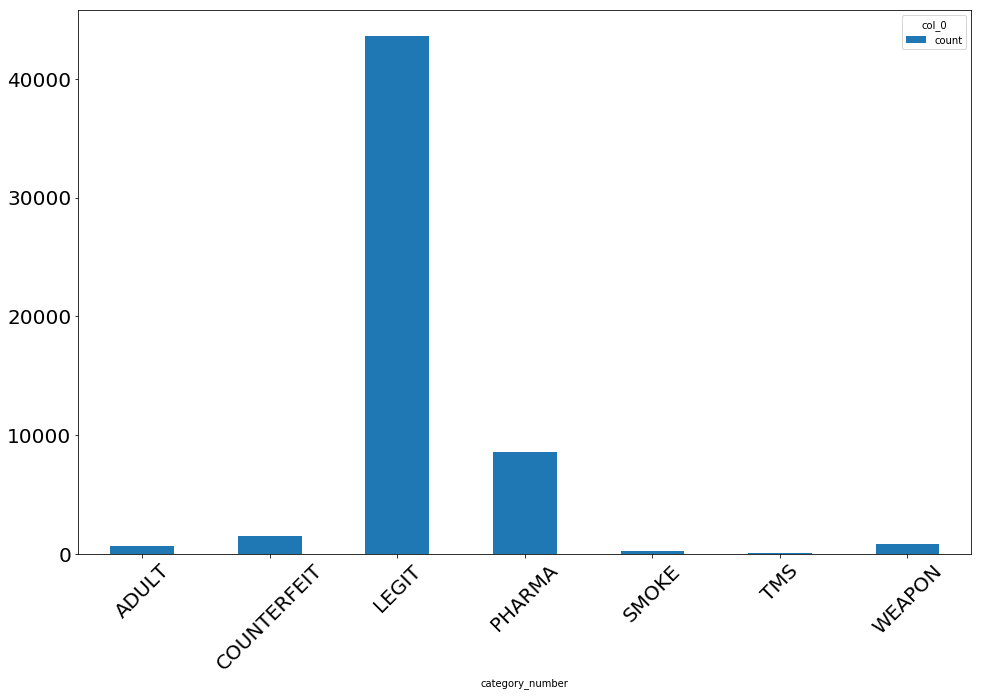

In [64]:
my_tab = pd.crosstab(index = df['category_number'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab.plot.bar(figsize = (16, 10), fontsize = 20, rot = 45)


In [65]:
(my_tab/my_tab.sum()) * 100

col_0                count
category_number           
ADULT             1.137470
COUNTERFEIT       2.664311
LEGIT            78.575549
PHARMA           15.432455
SMOKE             0.421819
TMS               0.205502
WEAPON            1.562894

In [66]:
df.head()

name category_number
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...           LEGIT
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...           LEGIT
2     Vitamins Biotics Research - Detoxification 4oz           LEGIT
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...           LEGIT
4  Herbal Supplements Natural Natural Blood Press...           LEGIT

In [67]:
cat_dict_reverse = {'ADULT':0, 'COUNTERFEIT':1, 'LEGIT':2, 'PHARMA':3, 'SMOKE':4,'TMS':5, 'WEAPON':6}
df['category_number'] = df['category_number'].map(cat_dict_reverse)
df.head()


/home/karkin.mun/environments/ml_dir/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


name  category_number
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...                2
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...                2
2     Vitamins Biotics Research - Detoxification 4oz                2
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...                2
4  Herbal Supplements Natural Natural Blood Press...                2

In [100]:
docs = df['name'].values
labels = df['category_number'].values


In [122]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [91]:
d = {} 

for val in docs:
    if str(len(val)) not in d:
        d[str(len(val))] = 0 
    
    d[str(len(val))] += 1     
    
    
# key = number of words in the sentence 
# value = number of occurences which has that number of words in the sentence 

sorted(d.items(), key = lambda x: int(x[0]))

[('1', 1),
 ('2', 1),
 ('3', 1),
 ('4', 3),
 ('5', 3),
 ('6', 4),
 ('7', 2),
 ('8', 6),
 ('9', 9),
 ('10', 16),
 ('11', 18),
 ('12', 18),
 ('13', 17),
 ('14', 22),
 ('15', 31),
 ('16', 42),
 ('17', 30),
 ('18', 45),
 ('19', 65),
 ('20', 69),
 ('21', 72),
 ('22', 93),
 ('23', 114),
 ('24', 128),
 ('25', 117),
 ('26', 153),
 ('27', 185),
 ('28', 222),
 ('29', 249),
 ('30', 260),
 ('31', 248),
 ('32', 287),
 ('33', 312),
 ('34', 336),
 ('35', 351),
 ('36', 386),
 ('37', 425),
 ('38', 433),
 ('39', 469),
 ('40', 526),
 ('41', 588),
 ('42', 594),
 ('43', 673),
 ('44', 687),
 ('45', 749),
 ('46', 809),
 ('47', 784),
 ('48', 793),
 ('49', 855),
 ('50', 870),
 ('51', 886),
 ('52', 879),
 ('53', 846),
 ('54', 863),
 ('55', 870),
 ('56', 931),
 ('57', 880),
 ('58', 862),
 ('59', 807),
 ('60', 860),
 ('61', 805),
 ('62', 827),
 ('63', 784),
 ('64', 759),
 ('65', 725),
 ('66', 691),
 ('67', 678),
 ('68', 705),
 ('69', 626),
 ('70', 651),
 ('71', 583),
 ('72', 607),
 ('73', 529),
 ('74', 572),
 ('7

In [ ]:
# max(d.items(), key = lambda x: int(x[0]))

# ('250', 29) seems like the good number to truncate 
# the sentence since beyond that, there's only a few sentence that has a length of over 250 

 The first step is to define the examples, encode them as integers, then pad the sequences to be the same length.
 
 In this case, we need to be able to map words to integers as well as integers to words.

Keras provides a Tokenizer class that can be fit on the training data, can convert text to sequences consistently by calling the texts_to_sequences() method on the Tokenizer class, and provides access to the dictionary mapping of words to integers in a word_index attribute.

In [101]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
# pad documents to a max length of 250 words 
max_length = 250
# using Keras's built in pad_sequences 
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')


In [102]:
len(encoded_docs)

55474

In [104]:
padded_docs, padded_docs.shape

(array([[   49,  1280,  1994, ...,     0,     0,     0],
        [   98,  1480,  1022, ...,     0,     0,     0],
        [   98,  1361,   350, ...,     0,     0,     0],
        ...,
        [ 2964, 12991,   984, ...,     0,     0,     0],
        [ 6474,   243,  5228, ...,     0,     0,     0],
        [ 5084,  1577,    48, ...,     0,     0,     0]], dtype=int32),
 (55474, 250))

Next, we need to load the entire GloVe word embedding file into memory as a dictionary of word to embedding array.

In [111]:
embeddings_index = dict()
f = open('glove.6B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [112]:
embeddings_index

{'howgill': array([ 0.16611  , -0.03701  , -0.19592  ,  0.18871  ,  0.12441  ,
        -0.11014  , -0.095574 , -0.49577  ,  0.054555 , -0.10114  ,
        -0.026499 ,  0.29727  , -0.25112  ,  0.20074  , -0.089423 ,
         0.0019792, -0.41087  ,  0.11152  ,  0.12377  , -0.16758  ,
        -0.056881 , -0.21839  , -0.16781  , -0.076438 , -0.19293  ,
        -0.078166 ,  0.10036  ,  0.10071  , -0.2592   ,  0.64406  ,
         0.3416   , -0.50259  ,  0.26091  ,  0.0050308, -0.044063 ,
        -0.2135   ,  0.10884  , -0.18281  ,  0.28161  ,  0.094988 ,
        -0.13554  ,  0.36583  , -0.15475  ,  0.053516 ,  0.018452 ,
         0.28138  ,  0.1318   ,  0.034476 ,  0.66064  ,  0.5374   ,
         0.029448 ,  0.14884  , -0.28121  , -0.78785  , -0.11377  ,
         0.85743  ,  0.16714  ,  0.084746 , -0.5241   , -0.30063  ,
        -0.089151 , -0.33518  ,  0.27735  ,  0.0075282, -0.51063  ,
        -0.10147  , -0.68222  ,  0.080392 , -0.26081  , -0.22331  ,
         0.048009 , -0.026414 ,  0.47

In [115]:
len(embeddings_index), len(embeddings_index['howgill'])

(400000, 100)

Next, we need to create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

The result is a matrix of weights only for words we will see during training.

In [117]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [118]:
embedding_matrix.shape

(35295, 100)

## Embedding Layer -> MLP 

In [126]:
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=250, trainable=False)

In [127]:
len(y[0])

7

In [129]:
model = Sequential()
model.add(e)
model.add(Flatten())

model.add(Dense(5000, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          3529500   
_________________________________________________________________
flatten_3 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 5000)              125005000 
_________________________________________________________________
dense_8 (Dense)              (None, 200)               1000200   
_________________________________________________________________
dense_9 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 357       
Total params: 129,545,107
Trainable params: 126,015,607
Non-trainable params: 3,529,500
______________________________________________________

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44379, 250), (11095, 250), (44379, 7), (11095, 7))

In [134]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience = 5, verbose=1)

In [135]:
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, callbacks = [es])


Train on 44379 samples, validate on 11095 samples
Epoch 1/50
44379/44379 [==============================] - 83s 2ms/step - loss: 0.2738 - acc: 0.9029 - val_loss: 0.2133 - val_acc: 0.9259
Epoch 2/50
44379/44379 [==============================] - 81s 2ms/step - loss: 0.1432 - acc: 0.9477 - val_loss: 0.1885 - val_acc: 0.9356
Epoch 3/50
44379/44379 [==============================] - 81s 2ms/step - loss: 0.0792 - acc: 0.9721 - val_loss: 0.2258 - val_acc: 0.9368
Epoch 4/50
44379/44379 [==============================] - 81s 2ms/step - loss: 0.0464 - acc: 0.9847 - val_loss: 0.3050 - val_acc: 0.9161
Epoch 5/50
44379/44379 [==============================] - 81s 2ms/step - loss: 0.0362 - acc: 0.9895 - val_loss: 0.3148 - val_acc: 0.9341
Epoch 6/50
44379/44379 [==============================] - 81s 2ms/step - loss: 0.0290 - acc: 0.9920 - val_loss: 0.2955 - val_acc: 0.9356
Epoch 7/50
44379/44379 [==============================] - 81s 2ms/step - loss: 0.0247 - acc: 0.9933 - val_loss: 0.2932 - val_acc

In [136]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
loss, accuracy

(0.020579780524075875, 0.9945469704139345)

In [137]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.2931576512740533, 0.935917079787149)

In [148]:
reverse_word_map = dict(map(reversed, t.word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices, is_list = False ):
    # Looking up words in dictionary
    if is_list:
        words = [reverse_word_map.get(letter) for letter in list_of_indices]
    else:
        words = reverse_word_map.get(list_of_indices)
    return(words)

In [155]:
my_texts = list(map(sequence_to_text, X_test[9]))
my_texts

['advil',
 '50',
 'count',
 'pain',
 'reliever',
 'fever',
 'reducer',
 'coated',
 'tablet',
 '200mg',
 'ibuprofen',
 'temporary',
 'pain',
 'relief',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 N

In [163]:
y_pred = model.predict_classes(X_test)
# y_pred = model.predict(X_test)

In [164]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [178]:
y_test_int =np.argmax(y_test, axis=1)

y_test_int

array([2, 2, 2, ..., 2, 2, 3])

In [186]:
len(np.where(y_pred != y_test_int)[0])

711

In [189]:
len(df[df['category_number'] != 2])

11885

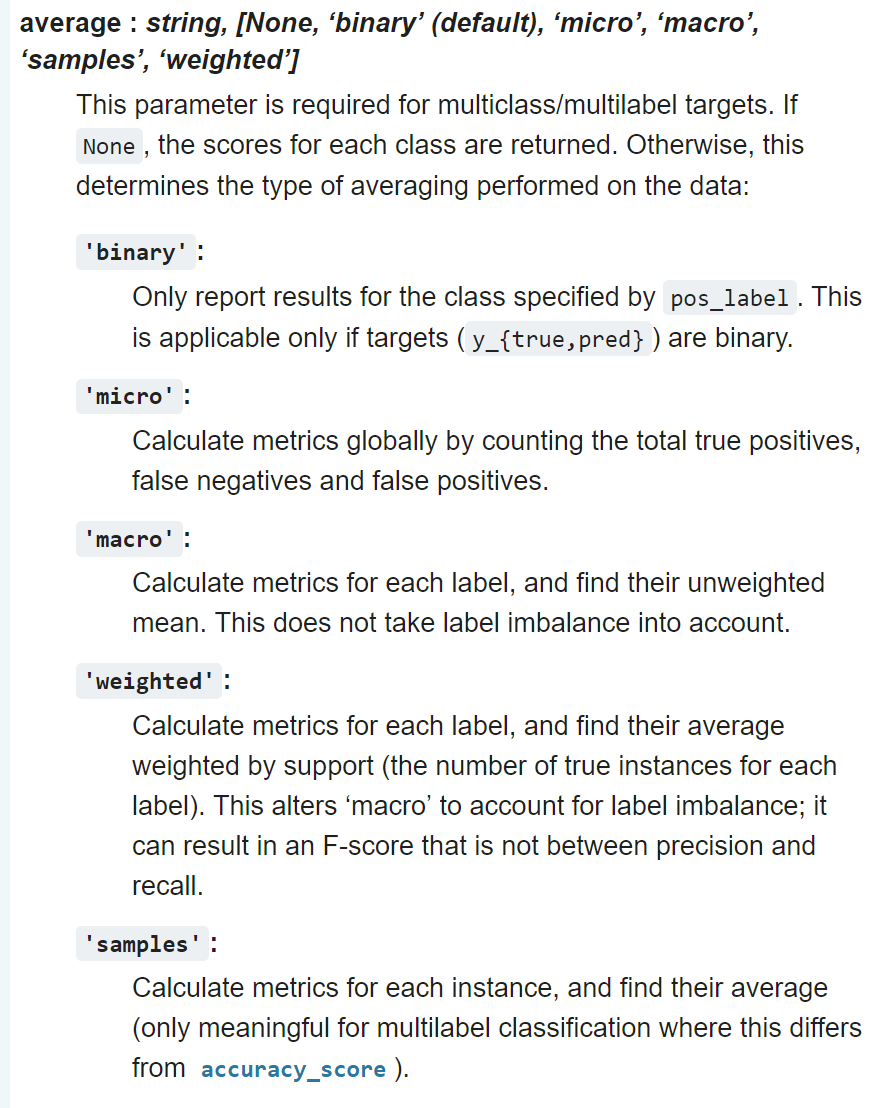

In [196]:
from sklearn.metrics import f1_score, classification_report

In [193]:
f1_score(y_test_int, y_pred, average = 'micro')

0.9359170797656602

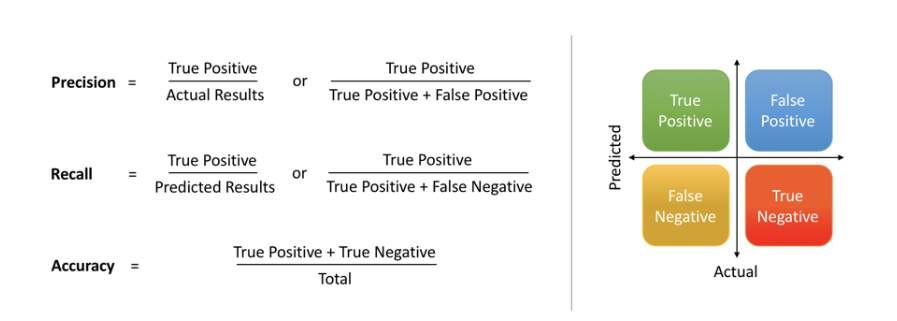

In [200]:
target_name = ['ADULT', 'COUNTERFEIT', 'LEGIT', 'PHARMA', 'SMOKE', 'TMS', 'WEAPON']
print(classification_report(y_test_int, y_pred, target_names=target_name))

              precision    recall  f1-score   support

       ADULT       0.86      0.76      0.81       126
 COUNTERFEIT       0.87      0.85      0.86       307
       LEGIT       0.96      0.96      0.96      8741
      PHARMA       0.84      0.81      0.83      1673
       SMOKE       0.81      0.96      0.88        48
         TMS       1.00      0.90      0.95        31
      WEAPON       0.93      0.98      0.95       169

    accuracy                           0.94     11095
   macro avg       0.90      0.89      0.89     11095
weighted avg       0.94      0.94      0.94     11095



## Embedding -> LSTM -> MLP 

In [ ]:
# reference: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

from keras.layers import LSTM, Dropout

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=250, trainable=False)

model = Sequential()
model.add(e)
#model.add(LSTM(80, return_sequences = True ))
#model.add(Dropout(0.2))
model.add(LSTM(20000, input_shape=(250, 100)))
#model.add(Dropout(0.2))

model.add(Dense(1000, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 5, verbose=1)
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, batch_size = 32, callbacks = [es])

In [220]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
loss, accuracy

(0.7279421931573835, 0.7852362604068601)

In [221]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.7297645714380764, 0.7878323569014138)

In [222]:
y_pred = model.predict_classes(X_test)


In [223]:
f1_score(y_test_int, y_pred, average = 'micro')

0.7878323569175304

In [224]:
print(classification_report(y_test_int, y_pred, target_names=target_name))

              precision    recall  f1-score   support

       ADULT       0.00      0.00      0.00       126
 COUNTERFEIT       0.00      0.00      0.00       307
       LEGIT       0.79      1.00      0.88      8741
      PHARMA       0.00      0.00      0.00      1673
       SMOKE       0.00      0.00      0.00        48
         TMS       0.00      0.00      0.00        31
      WEAPON       0.00      0.00      0.00       169

    accuracy                           0.79     11095
   macro avg       0.11      0.14      0.13     11095
weighted avg       0.62      0.79      0.69     11095



In [225]:
# reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [226]:
model.save("model_LSTM_MLP_OSM.h5")


## Embedding -> Conv1D -> MLP 

In [227]:
# reference: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

from keras.layers import LSTM, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=250, trainable=False)

model = Sequential()
model.add(e)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(2500, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 250, 100)          3529500   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 250, 32)           9632      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 2500)              10002500  
_________________________________________________________________
dense_30 (Dense)             (None, 200)               500200    
_________________________________________________________________
dense_31 (Dense)             (None, 50)                10050     
__________

In [228]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 5, verbose=1)
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, batch_size = 32, callbacks = [es])

Train on 44379 samples, validate on 11095 samples
Epoch 1/50


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1d_2/convolution/Conv2D}} = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_5/Adam/gradients/conv1d_2/convolution/Conv2D_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv1d_2/convolution/ExpandDims_1)]]
	 [[{{node loss_9/mul/_1167}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_787_loss_9/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
loss, accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

In [ ]:
y_pred = model.predict_classes(X_test)


In [ ]:
f1_score(y_test_int, y_pred, average = 'micro')

In [ ]:
print(classification_report(y_test_int, y_pred, target_names=target_name))

In [ ]:
model.save("model_LSTM_CNN_MLP_OSM.h5")


## Embedding -> Conv1d -> MLP 

In [ ]:
# reference: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

from keras.layers import LSTM, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=250, trainable=False)

model = Sequential()
model.add(e)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 5, verbose=1)
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, batch_size = 32, callbacks = [es])

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
loss, accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

In [ ]:
y_pred = model.predict_classes(X_test)


In [ ]:
f1_score(y_test_int, y_pred, average = 'micro')

In [ ]:
print(classification_report(y_test_int, y_pred, target_names=target_name))

In [ ]:
model.save("model_CNN_MLP_OSM.h5")
